# K-MEANS

### Librería y datos

In [31]:
#Librerias a importar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [34]:
#Importar variables en df
data = pd.read_excel("C:/Users/A00836554/Desktop/Data/PREPROCESAMIENTO/K-means/2015.xlsx")
df = pd.DataFrame(data)

In [35]:
#Cantidad de variables y observaciones por grupo de datos
df.shape

(86, 36)

## Codo de jambu
### Busqueda de la cantidad de clusters optimos a formar

In [36]:
wcss = [] #lista vacía que va almacenando los valores de los errores que se van calculando

for i in range(1,11): #bucle que asigna valores a la variables i en un rango de 1 a 11 (grafica 10)
  kmeans = KMeans(n_clusters = i, max_iter=300, init ='k-means++') #se crea modelo con el metodo kmean y se indica que la cantidad de clusters cambia con i; 300 iteraciones
  kmeans.fit(df) #aplicacion del modelo kmean a las caracteristicas normalizadas
  wcss.append(kmeans.inertia_) #se agrega el valor de wscc a la lista 

C:\Users\A00836554\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
wcss

[2.757052975685587e+20,
 3.128806258034218e+19,
 6.767759688960824e+18,
 2.2022955546185966e+18,
 1.1096190700460169e+18,
 6.086778727603988e+17,
 4.3721060630886803e+17,
 3.024153251766622e+17,
 1.9727342550413306e+17,
 1.5748024609614896e+17]

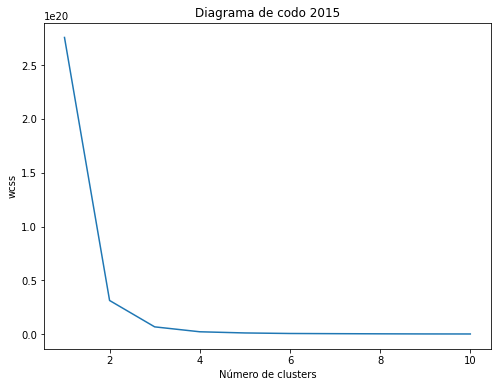

<Figure size 432x288 with 0 Axes>

In [77]:
# Graficar codo
plt.figure(figsize=(8,6))
plt.plot(range(1,11) , wcss) 
plt.title("Diagrama de codo 2015")
plt.xlabel("Número de clusters")
plt.ylabel("wcss")
plt.show()
plt.savefig("C:/Users/A00836554/Desktop/Data/PREPROCESAMIENTO/K-means/Figuras/Diagrama_2015.jpg")

Según el grafico anterior la cantidad optima de clusteres a formar son 3, ya que en este número la línea deja de disminuir drasticamente

### Evaluar cantidad de variables a agrupar y cantidad de clusteres a formar

In [39]:
def k_means(k,i):
    """k = cantidad de clusteres
       i = cantidad de variables"""
       
    df_n = df[df.columns[0:i]] #se crea df_n
    scaler = preprocessing.StandardScaler()
    Df = scaler.fit_transform(df_n) #Normaliza df_n
    
    kmeans = KMeans(n_clusters = k, init = 'random', max_iter = 150, n_init = 20, random_state = 0) #Criterios de la agrupación
    kmeans.fit(Df) # entrenar el modelo con los datos normalziados
    centroides, etiquetas = kmeans.cluster_centers_, kmeans.labels_
    
    etiquetas = pd.Series(etiquetas)
    
    return (etiquetas.value_counts(normalize=True))

In [30]:
#Retornar las agrupaciones a formar segpun la cantidad de variables 
for i in range(5,37): #mínimo 5 variables y maximo 36
    print("Número de variables {}\n{}".format(i,k_means(3,i))) #Indicar tres clusteres para todas las variables 

Número de variables 5
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 6
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 7
0    0.767442
1    0.197674
2    0.034884
dtype: float64
Número de variables 8
0    0.767442
1    0.197674
2    0.034884
dtype: float64
Número de variables 9
0    0.767442
1    0.197674
2    0.034884
dtype: float64
Número de variables 10
0    0.767442
1    0.197674
2    0.034884
dtype: float64
Número de variables 11
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 12
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 13
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 14
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 15
0    0.767442
2    0.197674
1    0.034884
dtype: float64
Número de variables 16
0    0.790698
1    0.174419
2    0.034884
dtype: float64
Número de variables 17
0    0.953488
1    0.0

El acomulado de 33 variables crea un buen agrupamiento 

In [44]:
df.columns[:33]

Index(['PRODBR2', 'CONSMATE', 'CONSIN', 'CONSIN2', 'SALPEYTE', 'INVEBRTA',
       'PERTOTAL', 'VALORCOM', 'VALORCX', 'VALORVEN', 'c3r19c3', 'c3r23c1',
       'c3r15c1', 'c6r2c3', 'c6r3c3', 'c6r4c3', 'c7c2r4', 'c7c3r4', 'c3r17c1',
       'c3r14c1', 'c3r41c1', 'c6r1c3', 'c7r17c2', 'c7r17c3', 'c7c3r12',
       'c7r1c6', 'c7r5c6', 'c7r6c6', 'c3r42c1', 'c7r1c2', 'c7r5c2', 'c7r6c2',
       'c3r16c1'],
      dtype='object')

In [53]:
#Variables que entran al k-means
Variables = ['PRODBR2', 'CONSMATE', 'CONSIN', 'CONSIN2', 'SALPEYTE', 'INVEBRTA',
       'PERTOTAL', 'VALORCOM', 'VALORCX', 'VALORVEN', 'c3r19c3', 'c3r23c1',
       'c3r15c1', 'c6r2c3', 'c6r3c3', 'c6r4c3', 'c7c2r4', 'c7c3r4', 'c3r17c1',
       'c3r14c1', 'c3r41c1', 'c6r1c3', 'c7r17c2', 'c7r17c3', 'c7c3r12',
       'c7r1c6', 'c7r5c6', 'c7r6c6', 'c3r42c1', 'c7r1c2', 'c7r5c2', 'c7r6c2',
       'c3r16c1']

In [58]:
#DataFrame que guarda las variables que entran al agrupamiento
df_n = df[Variables]

## Normalización de datos

In [55]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Df = scaler.fit_transform(df_n)

## Aplicación k-means

In [64]:
#Criterios del agrupamiento
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 150, n_init=20, random_state=0) #ingregar parametros al algoritmo
#Tres clusters, inicialización, cantidad de iteraciones y número de veces a ejecutar con diferentes centroide

In [65]:
#Entrenamiento del modelo
kmeans.fit(Df) 

KMeans(max_iter=150, n_clusters=3, n_init=20, random_state=0)

In [66]:
#devolver las coordanadas de los centroides y las eitquetas de cada cluster calculado
centroides, etiquetas = kmeans.cluster_centers_, kmeans.labels_
centroides, etiquetas

(array([[ 0.16965876,  0.40664658, -0.19143349,  0.36854966, -0.15630896,
         -0.1784242 , -0.19947031,  0.35749753, -0.19227538,  0.17296374,
          0.28604125, -0.1792935 , -0.10344999, -0.19097095, -0.10653017,
          0.36554874, -0.10846523, -0.10846523,  0.06434742, -0.12871673,
         -0.16659287,  0.50952506,  0.        ,  0.3968715 ,  0.76397117,
         -0.17168979, -0.06842661, -0.17518726, -0.33345867, -0.1124361 ,
          0.17050985, -0.1881729 ,  0.01963617],
        [ 5.04162172,  4.66282684,  5.25077863,  4.73697291,  5.11538629,
          5.25739889,  5.154937  ,  4.76091006,  5.25970359,  5.03753486,
          4.80068005,  5.25957411,  5.19741372,  5.25986316,  4.93698241,
          4.08188867, -0.10846523, -0.10846523,  3.65245564, -0.1652163 ,
          5.24037089,  3.80460104,  0.        , -0.22391562, -0.35698046,
          5.25275934,  5.21614187,  5.25899466,  0.59486796,  5.04402469,
          3.34623612,  5.25985497,  1.95883596],
        [-0.34

In [67]:
#determinar el cluster al que pertenece
muestra_prediccion = kmeans.predict(Df)
muestra_prediccion

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2])

## Graficar
Se observa en dos componenetes reduciendo la dimensionalidad en el PCA

In [68]:
#Aplicar reducción de dimensionalidad por medio de PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(Df)
pca = modelo_pca.transform(Df)

In [69]:
#Definición de centroides y clusteres
centroides_pca = modelo_pca.transform(centroides)
colores = ['blue', 'green', 'orange']
colores_cluster = [colores[etiquetas[i]] for i in range (len(pca))]

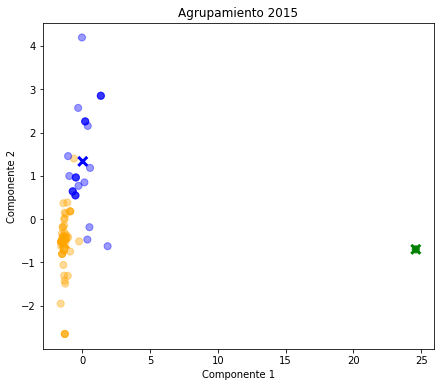

In [74]:
#Grafica
plt.figure(figsize=(7,6))
plt.scatter(pca[:,0], pca[:,1], c = colores_cluster, marker='o', s=50, alpha=0.4)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='x', s=80, linewidths=3, c=colores)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Agrupamiento 2015")
plt.savefig("C:/Users/A00836554/Desktop/Data/PREPROCESAMIENTO/K-means/Figuras/Agrupamiento_2015.jpg")

In [78]:
#Agregar columna de etiquetas de cluster
df_n['KMeans_Clusters'] = kmeans.labels_

C:\Users\A00836~1\AppData\Local\Temp/ipykernel_15316/3511303919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['KMeans_Clusters'] = kmeans.labels_


In [80]:
df_n.to_excel("C:/Users/A00836554/Desktop/Data/PREPROCESAMIENTO/K-means/cluster2015.xlsx")

## Análisis

In [89]:
df_n.groupby('KMeans_Clusters').agg(["count", "max", "min", "mean"])

PRODBR2                                       CONSMATE  \
                  count         max         min          mean    count   
KMeans_Clusters                                                          
0                    26  1035984842   199696430  5.526029e+08       26   
1                     3  5366718950  5366718950  5.366719e+09        3   
2                    57   240725247      433370  4.629130e+07       57   

                                                      CONSIN             ...  \
                        max         min          mean  count        max  ...   
KMeans_Clusters                                                          ...   
0                 949353519   180706617  5.097492e+08     26    2033992  ...   
1                2902178337  2902178337  2.902178e+09      3  224529484  ...   
2                 213799585           0  3.895840e+07     57   22152582  ...   

                  c7r5c2               c7r6c2                        \
                     min          mean  count        max        min   
KMeans_Clusters                                                       
0                      0  1.236982e+06     26    1607222          0   
1                9931350  9.931350e+06      3  407159776  407159776   
2                      0  7.506702e+04     57    2000427          0   

                              c3r16c1                                  
                         mean   count      max      min          mean  
KMeans_Clusters                                                        
0                2.898228e+05      26  1825669        0  2.463024e+05  
1                4.071598e+08       3  1096525  1096525  1.096525e+06  
2                7.859821e+04      57  2347871        0  1.885644e+05  

[3 rows x 132 columns]

In [91]:
df_n.groupby('KMeans_Clusters').agg(["count", "max", "min", "mean"]).to_excel("C:/Users/A00836554/Desktop/Data/PREPROCESAMIENTO/K-means/gruopby2015.xlsx")